In [2]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk import sent_tokenize,word_tokenize
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

In [3]:
df = pd.read_csv('~/Desktop/datasets/articles3.csv')

In [4]:
df.head(5)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,103459,151908,Alton Sterling’s son: ’Everyone needs to prote...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...
1,103460,151909,Shakespeare’s first four folios sell at auctio...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeare’s first four boo...
2,103461,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
3,103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
4,103463,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...


In [5]:
#shape of dataset
print(df.shape)
print(df.ndim)

(42571, 10)
2


In [6]:
#null values
df.isnull().sum()

Unnamed: 0       0
id               0
title            1
publication      0
author         972
date            15
year            15
month           15
url              0
content          0
dtype: int64

In [7]:
df['word_count'] = df['content'].apply(lambda x: len(str(x).split(" ")))
df[['content','word_count']].head()

,content,word_count
0,The son of a Louisiana man whose father was sh...,355
1,Copies of William Shakespeare’s first four boo...,210
2,"Debt: $20, 000, Source: College, credit cards,...",778
3,"It was late. I was drunk, nearing my 35th birt...",728
4,A central Texas man serving a life sentence fo...,378


In [8]:
##Descriptive statistics of word counts
df.word_count.describe()

count    42571.000000
mean       935.589697
std        728.681228
min          5.000000
25%        544.000000
50%        790.000000
75%       1108.000000
max      51861.000000
Name: word_count, dtype: float64

In [9]:
#Articles which have less than 10 words 
df.loc[df.word_count == 5]

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,word_count
36826,140288,210779,Britainâ€™s flat idea to tax soda and other su...,Washington Post,Catherine Rampell,2016-03-22,2016.0,3.0,https://web.archive.org/web/20160323000344/htt...,LONDON,5
38346,141808,212711,"In Orlando, an agonizing wait as shooting vict...",Washington Post,Hayley Tsukayama,2016-06-12,2016.0,6.0,https://web.archive.org/web/20160613001042/htt...,ORLANDO ”,5


In [10]:
#Articles which have maximum words
df.loc[df.word_count == 51861]

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,word_count
33119,136581,206095,Full transcript: FBI Director James Comey test...,Washington Post,Washington Post Staff,2017-03-20,2017.0,3.0,https://web.archive.org/web/20170321001527/htt...,Below is the full transcript from the...,51861


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


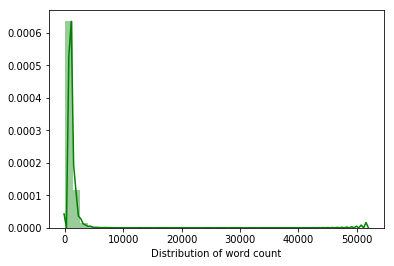

In [11]:
#Organize Data
SR = pd.Series(df['word_count'], name="Distribution of word count")

#Plot Data
fig, ax = plt.subplots()
sns.distplot(SR, color="g", bins = 40,ax=ax)
plt.show()

In [12]:
weights = np.ones_like(SR.values)/len(SR.values)

In [13]:
weights

array([2.34901694e-05, 2.34901694e-05, 2.34901694e-05, ...,
       2.34901694e-05, 2.34901694e-05, 2.34901694e-05])

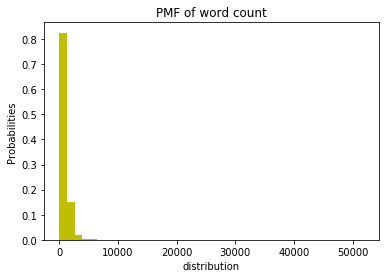

In [14]:
plt.hist(SR, bins=40, weights=weights, color="y",density=False)
plt.ylabel("Probabilities")
plt.xlabel('distribution')
plt.title("PMF of word count")
plt.show()

In [15]:
probs = pd.cut(SR,40)

In [16]:
#frequencies of bins
frequencies = Counter(probs)
print(frequencies)

Counter({Interval(-46.856, 1301.4, closed='right'): 35140, Interval(1301.4, 2597.8, closed='right'): 6402, Interval(2597.8, 3894.2, closed='right'): 736, Interval(3894.2, 5190.6, closed='right'): 189, Interval(5190.6, 6487.0, closed='right'): 52, Interval(6487.0, 7783.4, closed='right'): 29, Interval(7783.4, 9079.8, closed='right'): 7, Interval(9079.8, 10376.2, closed='right'): 5, Interval(15561.8, 16858.2, closed='right'): 2, Interval(14265.4, 15561.8, closed='right'): 2, Interval(11672.6, 12969.0, closed='right'): 2, Interval(10376.2, 11672.6, closed='right'): 1, Interval(50564.6, 51861.0, closed='right'): 1, Interval(28525.8, 29822.2, closed='right'): 1, Interval(19451.0, 20747.4, closed='right'): 1, Interval(12969.0, 14265.4, closed='right'): 1})


In [17]:
#sum of probabilities
sum(probs.value_counts(normalize=True))

1.0000000000000002

In [18]:
df['word_count'].quantile(0.90)

1607.0

In [19]:
probs2 = pd.qcut(SR,[0,0.9])

In [20]:
probs2.value_counts(normalize=True)

(4.999, 1607.0]    1.0
Name: Distribution of word count, dtype: float64

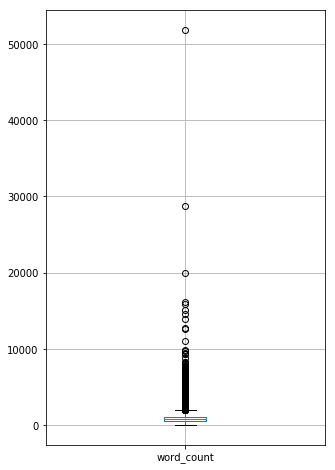

In [21]:
#boxplot for word_count
plt.rcParams["figure.figsize"] = (5,8)

bx = df.boxplot(column=['word_count'],fontsize=10)

In [22]:
df.word_count.describe()

count    42571.000000
mean       935.589697
std        728.681228
min          5.000000
25%        544.000000
50%        790.000000
75%       1108.000000
max      51861.000000
Name: word_count, dtype: float64

In [23]:
#taking 100 samples randomly
df2 = df.sample(n=100,replace=False,random_state=1)
print(df2.shape)

(100, 11)


In [24]:
df2.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,word_count
36906,140368,210885,Date Lab: He’s ‘Star Wars’ and she’s ‘Star Trek’,Washington Post,NaN,2016-03-24,2016.0,3.0,https://web.archive.org/web/20160327000343/htt...,"Interviews by Amanda McGrath He lifts, r...",836
33698,137160,206819,White House warns North Korea not to test U.S....,Washington Post,Anna Fifield,2017-04-17,2017.0,4.0,https://web.archive.org/web/20170417232933/htt...,TOKYO — Vice President Pence warned North...,286
18349,121811,180743,U.S.-Russia relations at another low after Syr...,Reuters,"Yeganeh Torbati, Denis Dyomkin and Jeff Mason",2017-04-13,2017.0,4.0,http://www.reuters.com/article/us-usa-russia-i...,The presidents of the United States and Russi...,1158
24091,127553,190744,Bayer’s Monsanto acquisition to face political...,Reuters,Diane Bartz and Greg Roumeliotis,2016-09-15,2016.0,9.0,http://www.reuters.com/article/us-monsanto-m-a...,As the global agricultural sector races to co...,1024
29287,132749,200127,The Cruz-Kasich alliance can’t work because no...,Vox,Matthew Yglesias,2016/4/25,2016.0,4.0,http://www.vox.com/2016/4/25/11503740/cruz-kas...,"Almost as soon as it was announced, the pact ...",601


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


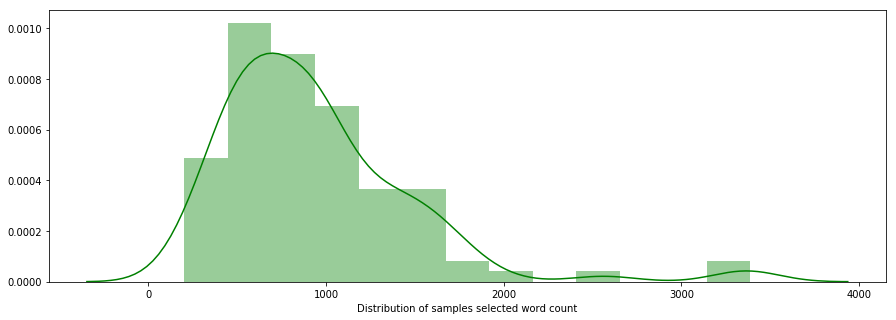

In [25]:
#let's see distribution of 100 samples selected randomly
#Organize Data
plt.rcParams["figure.figsize"] = (15,5)
SR2 = pd.Series(df2['word_count'], name="Distribution of samples selected word count")

#Plot Data
fig, ax = plt.subplots()
sns.distplot(SR2, color="g",ax=ax)
plt.show()

In [26]:
weights2 = np.ones_like(SR2.values)/len(SR2.values)

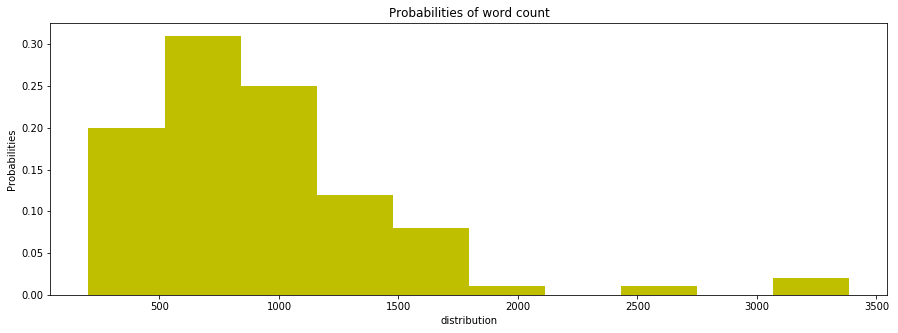

In [27]:
plt.hist(SR2, bins=10, weights=weights2, color='y', density=False)
plt.ylabel("Probabilities")
plt.xlabel('distribution')
plt.title("Probabilities of word count")
plt.show()

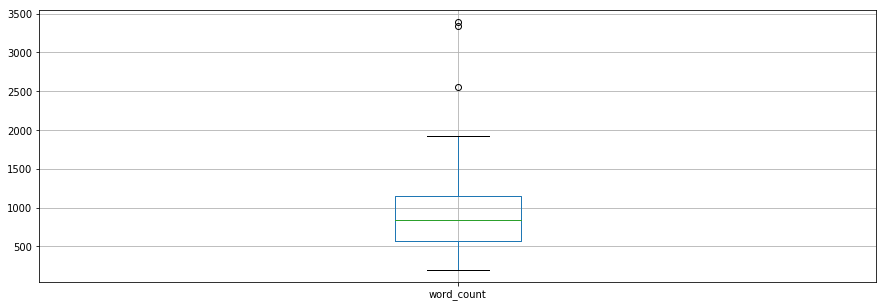

In [28]:
df2.boxplot(column=['word_count'])

In [29]:
# Libraries for text preprocessing

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [30]:
#nltk.download('stopwords')
#nltk.download('wordnet')

In [31]:
stop_words = set(stopwords.words('english'))
#print(stop_words)

#Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also",'would','could',
             'say',"iv", "one",'said', "two", "new",'he',"previously", "shown",'p','there','u']
stop = stop_words.union(new_words)
print(stop)

{'who', 'out', 'under', 'yourselves', 'hadn', 'haven', 'but', 'after', 'once', 'such', "shouldn't", "aren't", 'against', 'shan', 'to', 'two', 'previously', 'be', 'ain', 'some', "that'll", 'doing', 'theirs', 'during', 'as', 'more', 'have', 'very', 'mustn', 'show', 'there', 'said', 'having', 'into', 'me', 'one', 'what', 'when', 'didn', 'was', "won't", 'has', "hasn't", "didn't", 'on', "should've", "wasn't", 'wouldn', 'herself', 'for', "hadn't", 'did', 'few', 'you', 'with', 'nor', 'between', 'do', 'could', "isn't", 'aren', 'using', 'new', 'we', "doesn't", "she's", 'where', 'than', 'them', 'above', "you'll", 'other', 're', 'is', 'hers', 'they', 'result', 'whom', 'then', "haven't", 'her', 'this', 'say', 'too', 'his', 'up', 'are', 'and', 'y', 'needn', 'our', 'would', 'am', 'had', "couldn't", 'each', 'their', 'u', 'd', 'yours', 'don', "you're", 'p', 'm', 'wasn', "wouldn't", 'ours', "shan't", 'shouldn', 'in', 'again', 'doesn', "it's", 'a', "mustn't", 'ourselves', 'will', 'been', 'about', 'which

In [32]:
df2.content.head()

36906          Interviews by Amanda McGrath He lifts, r...
33698      TOKYO  —   Vice President Pence warned North...
18349     The presidents of the United States and Russi...
24091     As the global agricultural sector races to co...
29287     Almost as soon as it was announced, the pact ...
Name: content, dtype: object

In [33]:
#changing all words to lower case
df2['content'] = df2['content'].str.lower()

In [34]:
#remove tags
df2['content'] = df2['content'].str.replace(r'[^\w\s]+', '')

In [35]:
# remove special characters and digits
df2['content'] = df2['content'].str.replace('\d+', '')

In [36]:
#content2 is after removing stop words
df2['content'] = df2['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [37]:
df2.content.head()

36906    interviews amanda mcgrath lifts reads enjoys e...
33698    tokyo vice president pence warned north korea ...
18349    presidents united states russia wednesday pres...
24091    global agricultural sector races consolidate b...
29287    almost soon announced pact ted cruz john kasic...
Name: content, dtype: object

In [38]:
corpus = []
for i in range(0, 100):
    
    text = df2['content'].iloc[i]

    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [39]:
corpus[1]

'tokyo vice president penny warned north korea monday test military might pursuing nuclear weapon program citing recent strike syria afghanistan proof american strength resolve stark warning delivered seoul vice president went military demarcation line separate korea revive speculation white house considering military action regime pyongyang penny trump administration want persuade north korea abandon nuclear weapon peaceful mean repeated administration warning option table washington president trump told cnn annual white house easter egg roll north korea gotta behave white house spokesman sean spicer trump drawing red line sand north korea caption white house cabinet official left strong impression early day administration vice president penny tell north korea test american resolve vice president penny warned north korea april treatment syria afghanistan trump administration bombed month continues nuclear program stark warning delivered seoul vice president went military demarcation s

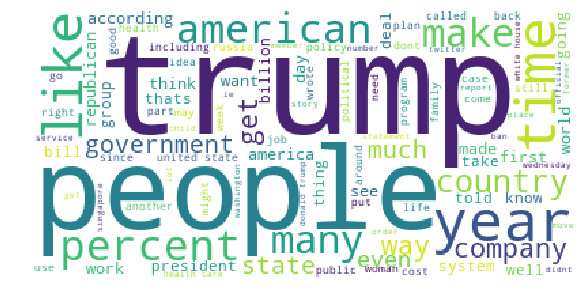

In [40]:
from wordcloud import WordCloud


wordcloud = WordCloud(background_color = 'white',max_words = 100, stopwords = stop,random_state=1).generate(str(corpus))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [41]:
#Countvectorization to know frequencies
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_df=0.8,stop_words=stop, max_features=10000, ngram_range=(1,3))
word_count_vec = cv.fit_transform(corpus)

In [42]:
word_count_vec.shape

(100, 10000)

In [78]:
print(word_count_vec.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [44]:
top_words = get_top_n_words(corpus,20)

In [45]:
top_df = pd.DataFrame(top_words)
top_df.columns = ['words','freq']

[Text(0, 0, 'trump'),
 Text(0, 0, 'people'),
 Text(0, 0, 'year'),
 Text(0, 0, 'time'),
 Text(0, 0, 'state'),
 Text(0, 0, 'like'),
 Text(0, 0, 'health'),
 Text(0, 0, 'percent'),
 Text(0, 0, 'american'),
 Text(0, 0, 'president'),
 Text(0, 0, 'make'),
 Text(0, 0, 'say'),
 Text(0, 0, 'many'),
 Text(0, 0, 'country'),
 Text(0, 0, 'white'),
 Text(0, 0, 'republican'),
 Text(0, 0, 'system'),
 Text(0, 0, 'company'),
 Text(0, 0, 'get'),
 Text(0, 0, 'care')]

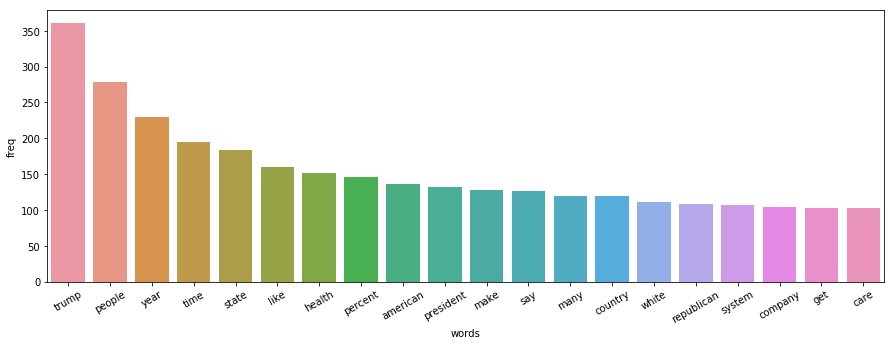

In [46]:
g = sns.barplot(x="words", y="freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [47]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [48]:
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]

[Text(0, 0, 'united state'),
 Text(0, 0, 'donald trump'),
 Text(0, 0, 'health care'),
 Text(0, 0, 'white house'),
 Text(0, 0, 'last year'),
 Text(0, 0, 'national security'),
 Text(0, 0, 'health insurance'),
 Text(0, 0, 'supreme court'),
 Text(0, 0, 'care act'),
 Text(0, 0, 'trump administration'),
 Text(0, 0, 'last week'),
 Text(0, 0, 'president trump'),
 Text(0, 0, 'secretary state'),
 Text(0, 0, 'hillary clinton'),
 Text(0, 0, 'dont know'),
 Text(0, 0, 'time warner'),
 Text(0, 0, 'vice president'),
 Text(0, 0, 'president donald'),
 Text(0, 0, 'social medium'),
 Text(0, 0, 'white people')]

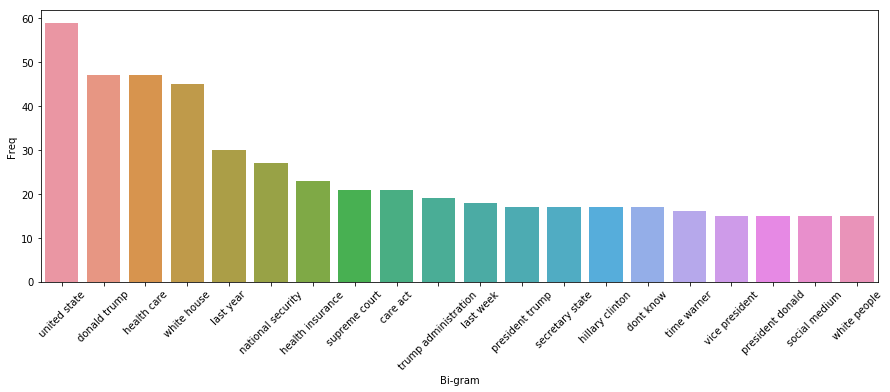

In [49]:
#Barplot of most freq Bi-grams
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [50]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [51]:
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

[Text(0, 0, 'president donald trump'),
 Text(0, 0, 'affordable care act'),
 Text(0, 0, 'health care system'),
 Text(0, 0, 'last man standing'),
 Text(0, 0, 'sofía muñoz boullosa'),
 Text(0, 0, 'saul leiter courtesy'),
 Text(0, 0, 'leiter courtesy howard'),
 Text(0, 0, 'courtesy howard greenberg'),
 Text(0, 0, 'howard greenberg gallery'),
 Text(0, 0, 'greenberg gallery york'),
 Text(0, 0, 'vice president penny'),
 Text(0, 0, 'flying spaghetti monster'),
 Text(0, 0, 'national wildlife refuge'),
 Text(0, 0, 'american health care'),
 Text(0, 0, 'health care act'),
 Text(0, 0, 'according thomson reuters'),
 Text(0, 0, 'muñoz boullosa pedro'),
 Text(0, 0, 'people preexisting condition'),
 Text(0, 0, 'great white shark'),
 Text(0, 0, 'malheur national wildlife')]

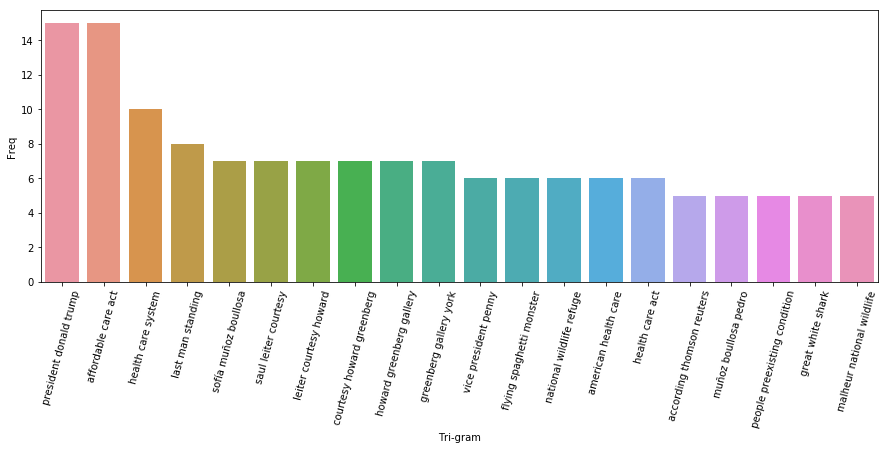

In [52]:
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=75)

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

In [54]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(word_count_vec)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [55]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'],ascending=False).head(10)

,idf_weights
zucker,4.921973
prri,4.921973
propulsion,4.921973
protect american,4.921973
protect american worker,4.921973
protects,4.921973
proverb,4.921973
highest standard,4.921973
providence,4.921973
high low,4.921973


In [56]:
heads = df2.title.values

In [57]:
# get feature names
feature_names=cv.get_feature_names()

In [58]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

In [59]:
#funtion to get top n keywords
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [69]:
#helper function to display keywords
def get_keywords(i):
    doc = corpus[i]
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    
    #extract only the top n; n here is 5
    keywords=extract_topn_from_vector(feature_names,sorted_items,5)
    
    
    # now print the results
    print('\nTitle:')
    print(heads[i])
    print("\nAbstract:")
    print(doc)
    print("\nKeywords:")
    for k in keywords:
        print(k,keywords[k])

In [75]:
get_keywords(int(input()))

78

Title:
Senate Republicans not ready to give up on Obamacare repeal

Abstract:
american health care act republican bill repeal replace obamacare suffered quick decisive defeat last week pulled house floor vote couldnt get enough support pas member congress already hinting want try house speaker paul ryan told reporter tuesday repeal effort continue hill across capitol many republican senator appeared undeterred house bill failure suggested senate might draft bill accomplish house republican couldnt think senate going move sen orrin hatch asked next step health care id love see house vote feel deeply may move dont think main area consensus obamacare suck better sen john kennedy put succinctly republican congress voted dozen time repeal obamacare president barack obama office replacing health law centerpiece campaign item many republican make sense legislator want continue pursue negotiation plan gain enough support move congress still exactly republican better big unknown republican 